## Agenda

[Business Context](#Business-Context)<br> 
&emsp;[Business Questions](#Business-Context)<br>
&emsp;[Hypothesis](#Business-Context)<br>

[Imports](#Imports)<br>
&emsp;[Helper Functions and Classes](#Helper-Functions-and-Classes)<br>

[Settings](#Settings)<br>

[Loading Data](#Loading-Data)<br>
&emsp;[df_orders_abt](#df_orders_abt)<br>

[Analytical Base Table](#Analytical-Base-Table)<br>
&emsp;[df_sales](#df_sales)<br>



[Decomposition](#Decomposition)<br>
&emsp;[Monthly](#Monthly)<br>

[Stationarity](#Stationarity)<br>

[Autocorrelation](#Autocorrelation)<br>

[Partial Autocorrelation](#Partial-Autocorrelation)<br>

## Business Context

E-Mart is a Chinese retailer that discovered the e-commerce as a way to sell to the entire world, rather than just to the population of their home city. The company has been growing without much worries, and now It wants to start using the data collected during its 4 years of e-commerce to keep growing and make more money.


The company has been growing without much worries, and now It wants to start using the data collected during the years to keep growing and make more money.
At first, the board of directors expects:

- A Dashboard with KPIs to track their growth.
<br>

- Robust Data Analysis, as well as recommendation of actions. What's the actionable based on your analysis?
<br>

- An Analysis on geolocation, a segmentation by sales, profit and more. They want insights to help increasing revenue.
<br>

- **Sales forecast for the next year, in order to enable strategic planning.**

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Helper Functions and Classes

In [2]:
def fig(x=15, y=5, set_as_global=False, reset_to_default=False):
    """ Adjust size of matplotlib figure

    x: figure width.
    y: figure height.
    set_as_global: bool.
        If True, then it sets "x" and "y" axis for all subsequent plots.
    reset_to_default: bool.
        If True, then it resets the global figure size back to default.
    """
    if set_as_global:
        plt.rcParams["figure.figsize"] = (x, y)
    elif reset_to_default:
        plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    else:
        plt.figure(figsize=(x,y))
 

### Settings

In [3]:
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 500)

fig(14, 9, set_as_global=True)

## Loading Data

### df_orders_abt

In [5]:
df_orders_abt = pd.read_csv("../../data/growth_analysis/orders_abt.csv")

## Analytical Base Table


### df_sales

In [6]:
df_sales = df_orders_abt[['order_date', 'sales']]

df_sales['order_date'] = pd.to_datetime(df_sales['order_date'])

df_sales.set_index('order_date', inplace=True)

C:\Users\Paulo H Sabino\AppData\Local\Temp\ipykernel_6624\1978695514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['order_date'] = pd.to_datetime(df_sales['order_date'])


## Decomposition

Time series with trend or with seasonality are not stationary.

We want the residuals to be as small as possible.

    Season = SARIMA

    Seasonal: same event occurs in the same period (every monday, every sunday).
    Cyclical: same event, but not in the same period (it might happen on sunday, it might happen on monday or saturday...)

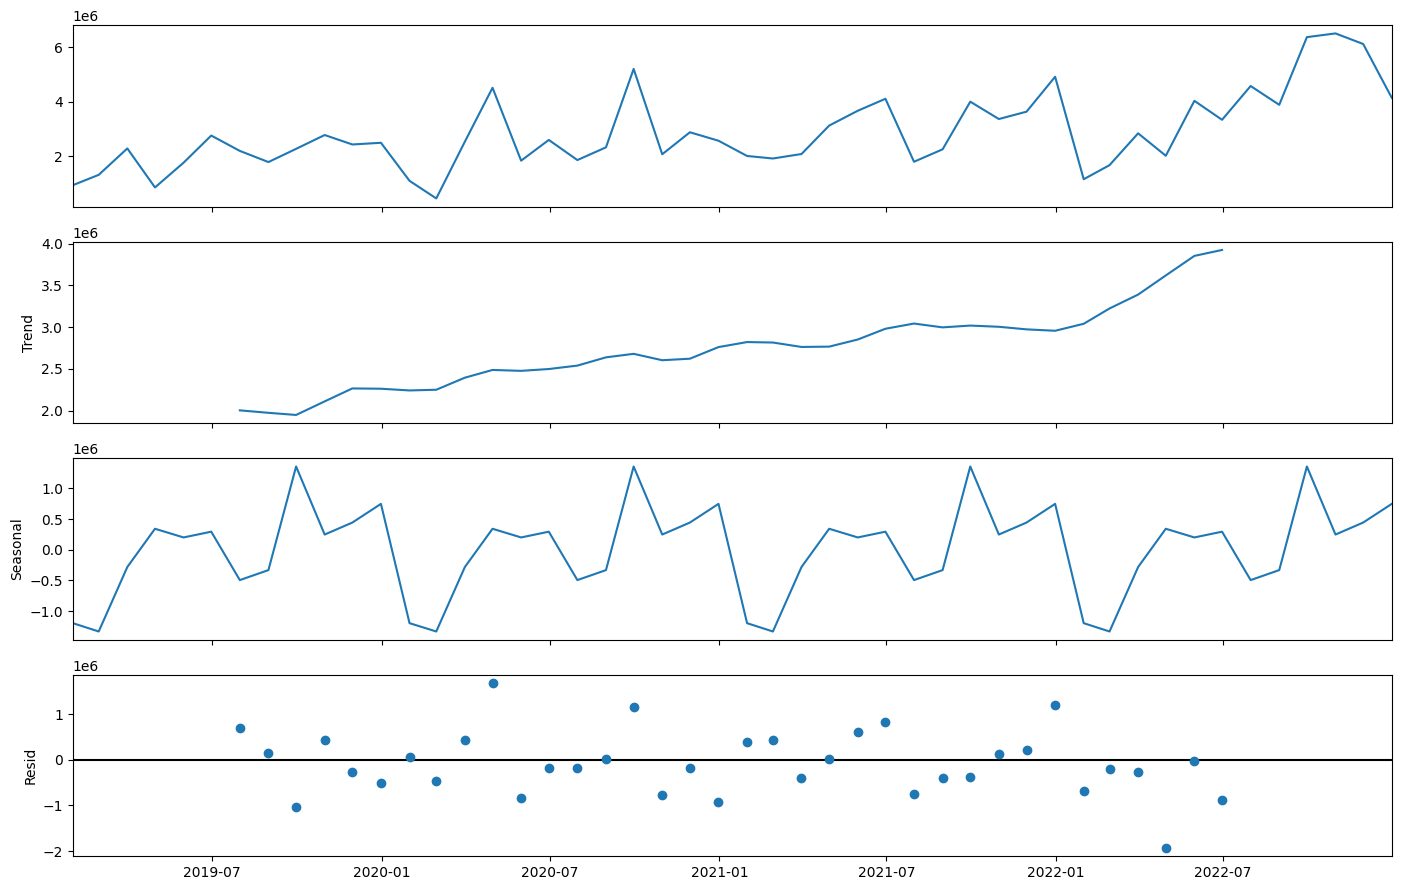

In [7]:
decomposition = seasonal_decompose(df_sales.resample('M').sum(), period=12)
decomposition.plot()
plt.show();

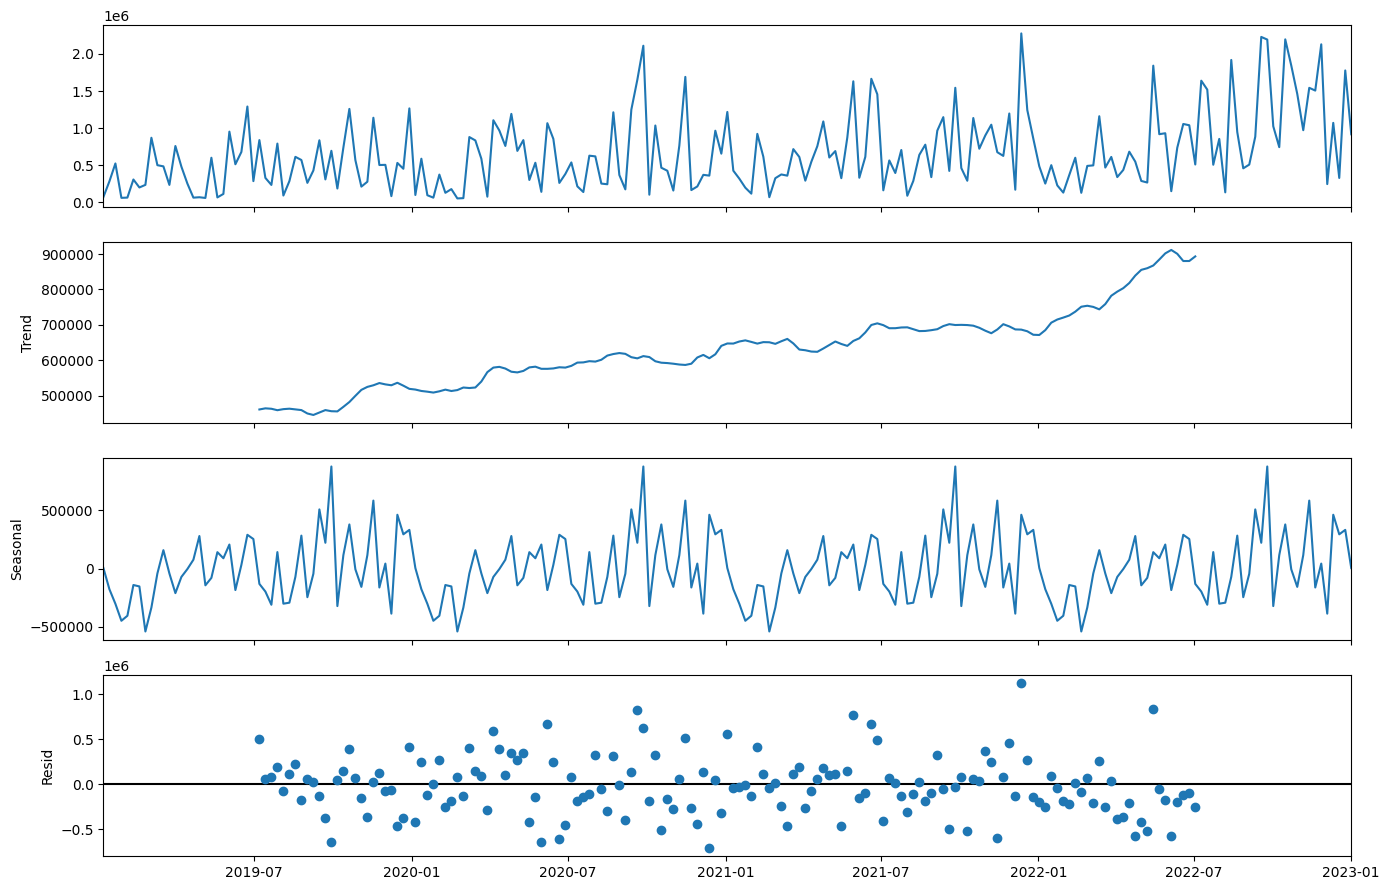

In [8]:
decomposition = seasonal_decompose(df_sales.resample('W').sum(), period=52)
decomposition.plot()
plt.show();

## Stationarity

**A stationary time series is one whose properties do not depend on the time at which the series is observed.
<br>
Thus, time series with trends, or with seasonality, are not stationary**

_Mean and variance are constant over a long time period._

[**Stationary: p-value <= 0.05**](https://machinelearningmastery.com/time-series-data-stationary-python/)

In [9]:
result = adfuller(df_sales.resample('M').sum())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Stationary:', (result[1] <= 0.05))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.884991
p-value: 0.002148
Stationary: True
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


diff

In [10]:
result = adfuller(df_sales.resample('M').sum().diff().dropna())
print('p-value: %f' % result[1])
print('Stationary:', (result[1] <= 0.05))

p-value: 0.000001
Stationary: True


In [11]:
result = adfuller(df_sales.resample('W').sum())
print('p-value: %f' % result[1])
print('Stationary:', (result[1] <= 0.05))

p-value: 0.005805
Stationary: True


diff

In [12]:
result = adfuller(df_sales.resample('W').sum().diff().dropna())
print('p-value: %f' % result[1])
print('Stationary:', (result[1] <= 0.05))

p-value: 0.000000
Stationary: True


## Autocorrelation

The autocorrelation of a series is nothing more than the correlation of a time series with a 'delayed' copy of itself (lag).

> Autocorrelation defines Moving Average Component (q)

In [13]:
fig(15, 5, True);

Autocorrelation for monthly revenue with lag equals 1: 51.0%
Autocorrelation for monthly revenue with lag equals 2: 34.0%
Autocorrelation for monthly revenue with lag equals 3: 30.0%
Autocorrelation for monthly revenue with lag equals 4: 15.0%
Autocorrelation for monthly revenue with lag equals 5: 28.0%
Autocorrelation for monthly revenue with lag equals 6: 25.0%
Autocorrelation for monthly revenue with lag equals 7: 5.0%


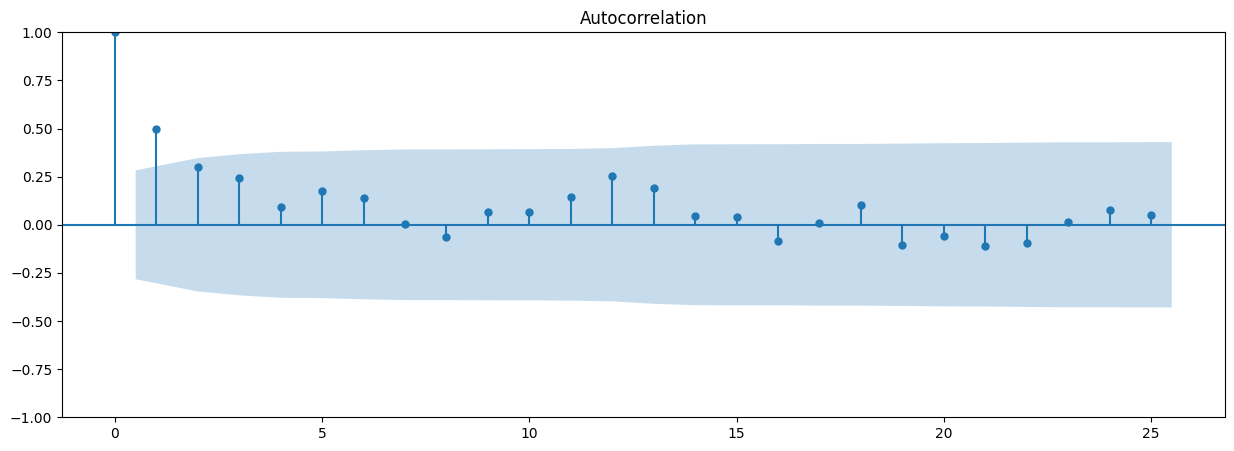

In [14]:
for lag in range(1, 8):
    autocorrelation = df_sales.resample('M').sum()['sales'].autocorr(lag)
    print(f"Autocorrelation for monthly revenue with lag equals {lag}: {np.round(autocorrelation*100)}%" )

plot_acf(df_sales.resample('M').sum(), lags=25, alpha = 0.05)
plt.show();

diff

Autocorrelation for monthly revenue with lag equals 1: -35.0%
Autocorrelation for monthly revenue with lag equals 2: -14.0%
Autocorrelation for monthly revenue with lag equals 3: 6.0%
Autocorrelation for monthly revenue with lag equals 4: -21.0%
Autocorrelation for monthly revenue with lag equals 5: 15.0%
Autocorrelation for monthly revenue with lag equals 6: 13.0%
Autocorrelation for monthly revenue with lag equals 7: -11.0%


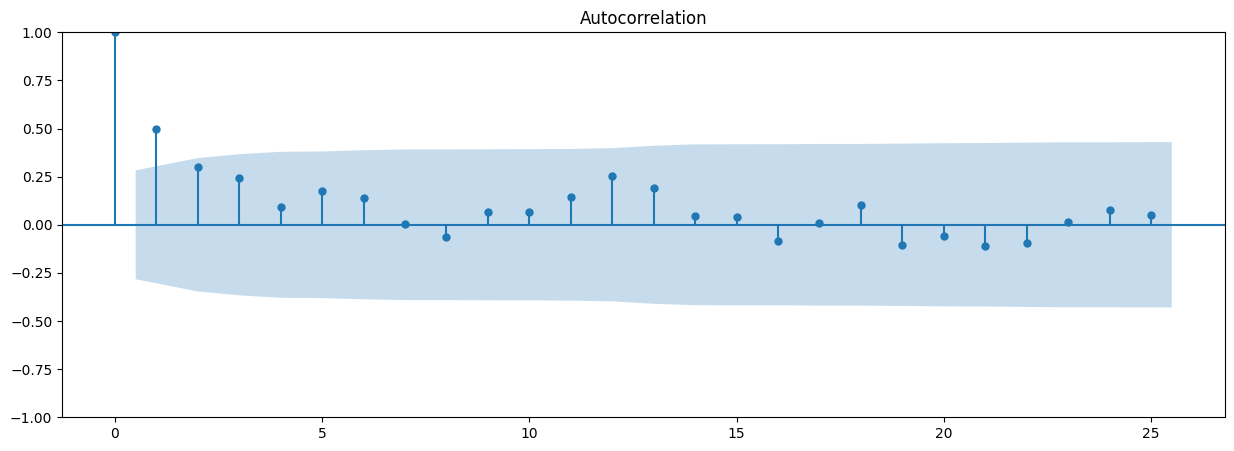

In [15]:
for lag in range(1, 8):
    autocorrelation = df_sales.resample('M').sum().diff().dropna()['sales'].autocorr(lag)
    print(f"Autocorrelation for monthly revenue with lag equals {lag}: {np.round(autocorrelation*100)}%" )

plot_acf(df_sales.resample('M').sum(), lags=25, alpha = 0.05)
plt.show();

Autocorrelation for weekly revenue with lag equals 1: 26.0%
Autocorrelation for weekly revenue with lag equals 2: 17.0%
Autocorrelation for weekly revenue with lag equals 3: 16.0%
Autocorrelation for weekly revenue with lag equals 4: 30.0%
Autocorrelation for weekly revenue with lag equals 5: 29.0%
Autocorrelation for weekly revenue with lag equals 6: 12.0%
Autocorrelation for weekly revenue with lag equals 7: 7.0%


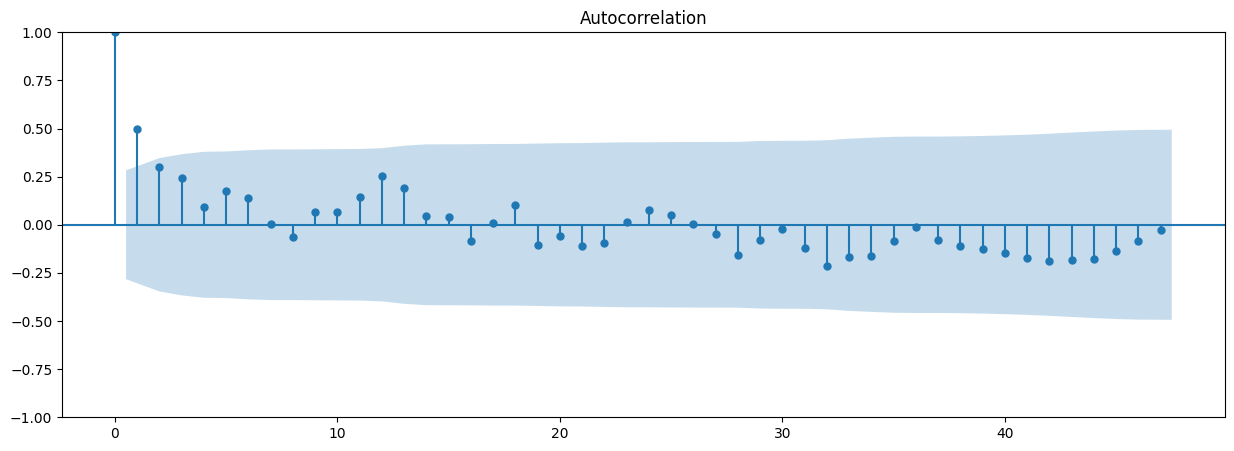

In [16]:
for lag in range(1, 8):
    autocorrelation = df_sales.resample('W').sum()['sales'].autocorr(lag)
    print(f"Autocorrelation for weekly revenue with lag equals {lag}: {np.round(autocorrelation*100)}%" )

plot_acf(df_sales.resample('M').sum(), lags=47, alpha = 0.05)
plt.show();

diff

Autocorrelation for weekly revenue with lag equals 1: -44.0%
Autocorrelation for weekly revenue with lag equals 2: -5.0%
Autocorrelation for weekly revenue with lag equals 3: -11.0%
Autocorrelation for weekly revenue with lag equals 4: 11.0%
Autocorrelation for weekly revenue with lag equals 5: 11.0%
Autocorrelation for weekly revenue with lag equals 6: -9.0%
Autocorrelation for weekly revenue with lag equals 7: -9.0%


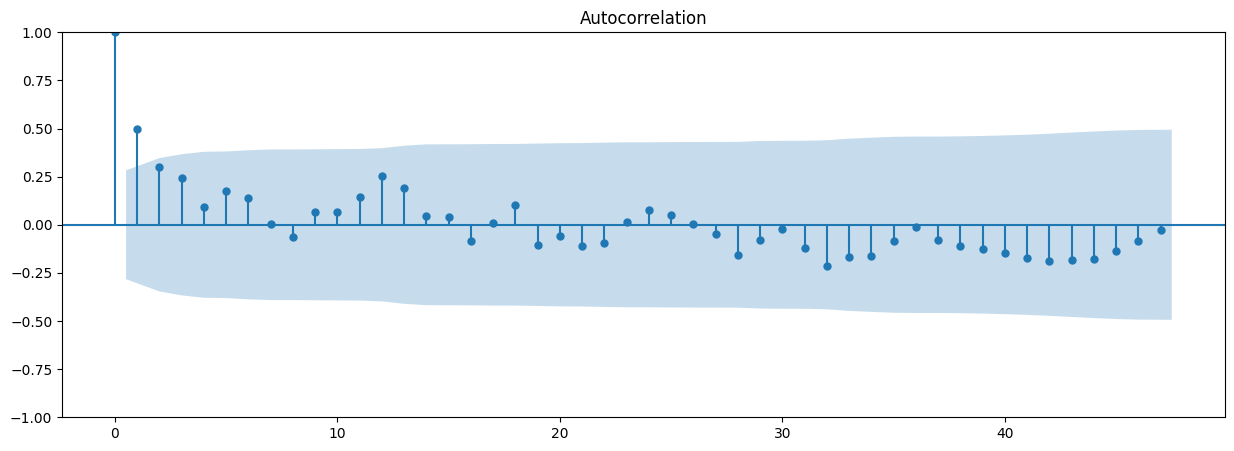

In [17]:
for lag in range(1, 8):
    autocorrelation = df_sales.resample('W').sum().diff().dropna()['sales'].autocorr(lag)
    print(f"Autocorrelation for weekly revenue with lag equals {lag}: {np.round(autocorrelation*100)}%" )

plot_acf(df_sales.resample('M').sum(), lags=47, alpha = 0.05)
plt.show();

## Partial Autocorrelation

> Partial Autocorrelation defines AutoRegressive Component (p)

_Direct Effect_

**P - current value of y is dependent on how many previous lagged.**

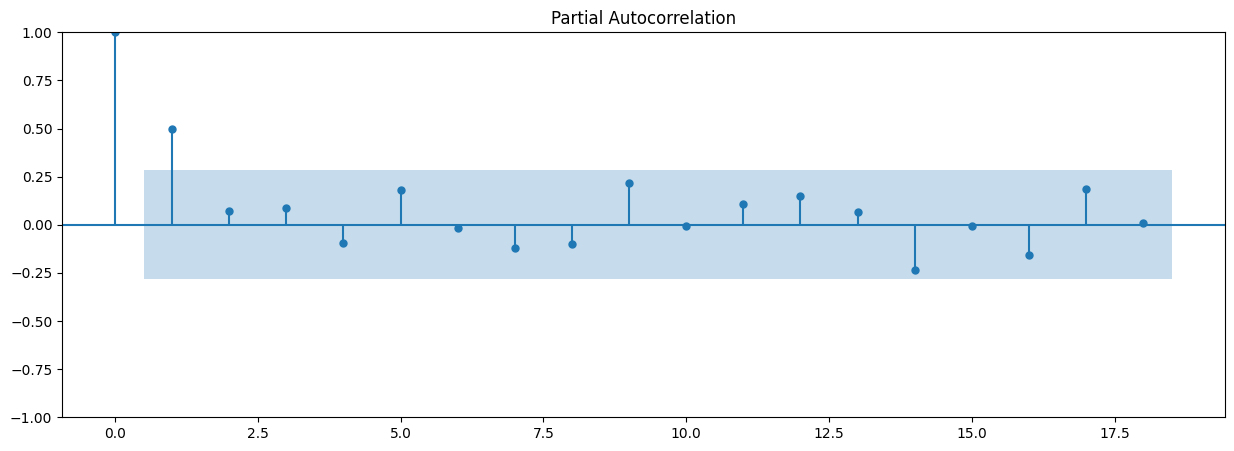

In [18]:
plot_pacf(df_sales.resample('M').sum(), lags=18, alpha = 0.05)
plt.show();

diff

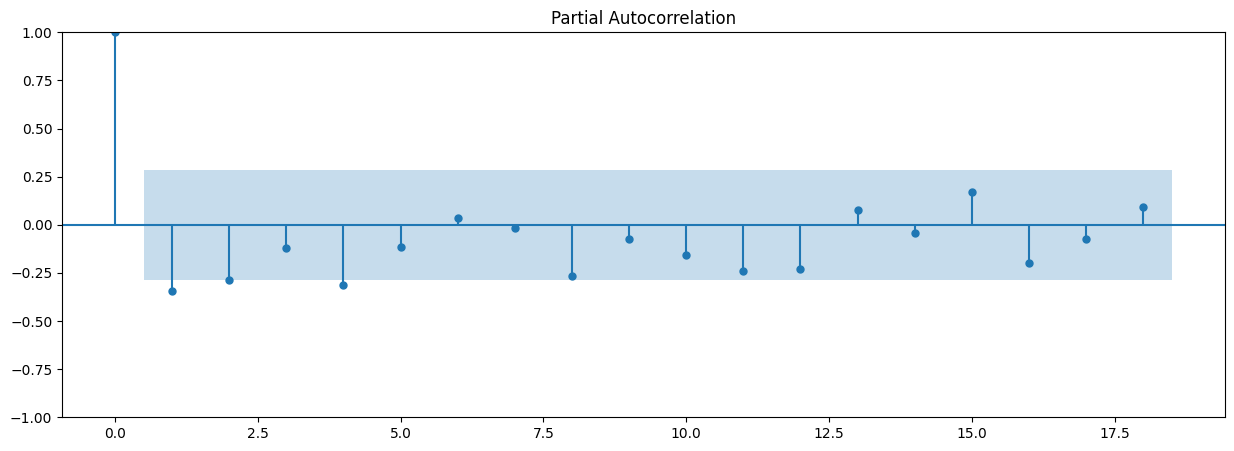

In [19]:
plot_pacf(df_sales.resample('M').sum().diff().dropna(), lags=18, alpha = 0.05)
plt.show();

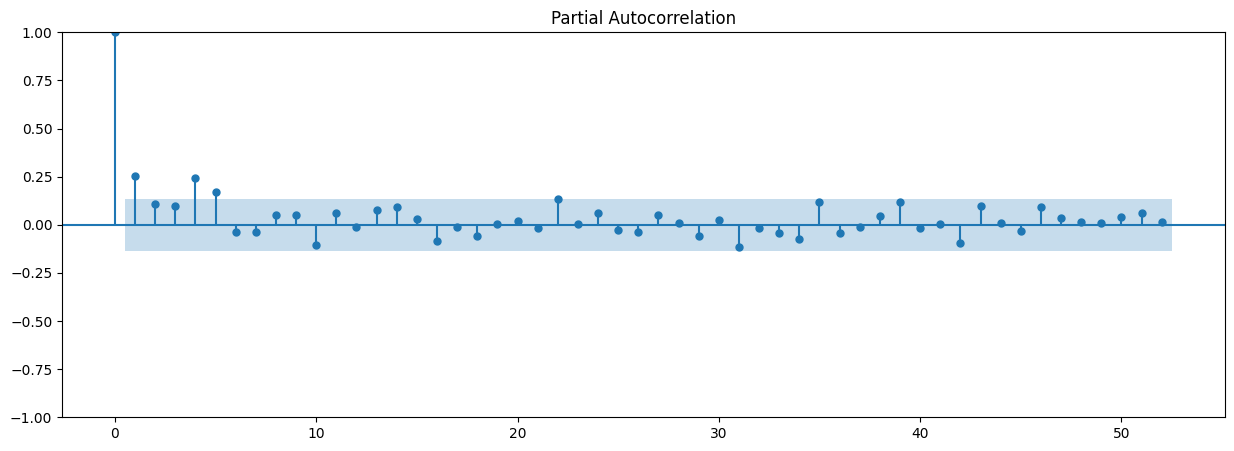

In [20]:
plot_pacf(df_sales.resample('W').sum(), lags=52, alpha = 0.05)
plt.show();

diff

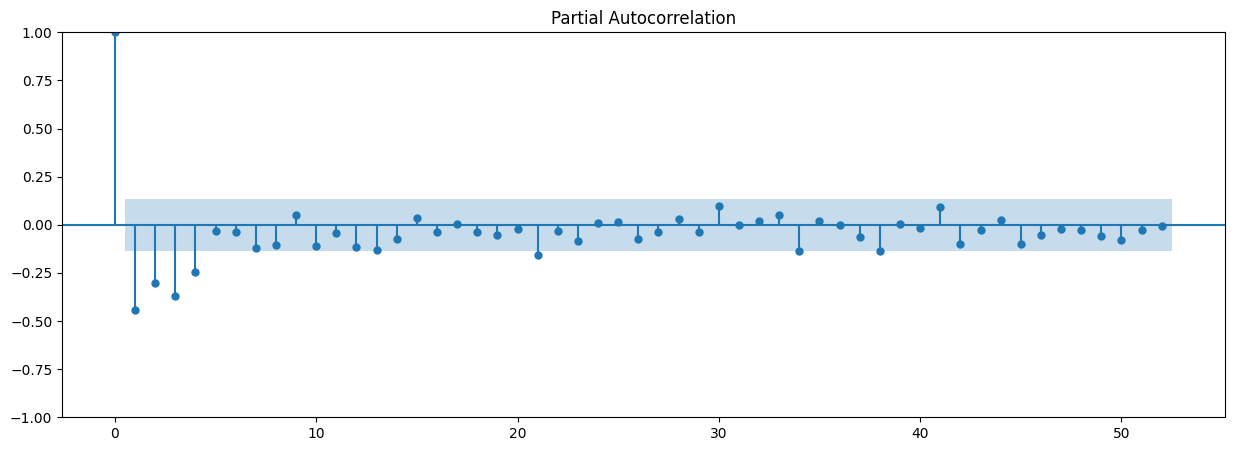

In [21]:
plot_pacf(df_sales.resample('W').sum().diff().dropna(), lags=52, alpha = 0.05)
plt.show();

##

Séries imprevisíveis (Ruído-branco e Random-Walk)

A definição de Ruído branco, é dada por

- Média Constante através do Tempo
- Desvio Constante através do tempo
- 0 autocorrelação

Forecasting: Principles and Practice (3rd ed): https://otexts.com/fpp3/

Spurious Correlations: https://www.tylervigen.com/spurious-correlations